# Problem Description:

A 1500 gallon tank initially contains 600 gallons of water with 5 lbs of salt dissolved in it.  Water enters the tank at a rate of 9 gal/hr and the water entering the tank has a salt concentration of  1/3 (1+  \cos(t)) lbs/gal.  If a well mixed solution leaves the tank at a rate of 6 gal/hr, how much salt is in the tank when it overflows?

This is a mixing problem, in these kind of problems a substance  is dissolved in a liquid.  Liquid will be entering and leaving a holding tank.  The liquid entering the tank may or may not contain more of the substance dissolved in it.  Liquid leaving the tank will of course contain the substance dissolved in it.  If Q(t) gives the amount of the substance dissolved in the liquid in the tank at any time t we want to develop a differential equation that, when solved, will give us an expression for Q(t).  Note as well that in many situations we can think of air as a liquid for the purposes of these kinds of discussions and so we don’t actually need to have an actual liquid, but could instead use air as the “liquid”.
 


The main assumption that is used here is that the concentration of the substance in the liquid is uniform throughout the tank.  
The main “equation” that we’ll be using to model this situation is 


$$ \text{Rate of change of }Q(t)= \text{ Rate at which } Q(t)\text{ enters the tank} - \text{ Rate at which } Q(t) \text{ exits the tank} $$

where

$$ \text{Rate of change of } Q(t)=\frac{dQ}{dt}=Q'(t) $$

$$\text{ Rate at which } Q(t)\text{ enters the tank}  = \text{(flow rate of liquid entering) x (concentration of substance in liquid entering).}$$

$$\text{ Rate at which } Q(t)\text{ exits the tank}  = \text{(flow rate of liquid exiting) x (concentration of substance in liquid exiting).}$$

### Concentration :
$$ Q(t)$$
### Volume of water :
$$ 600 + 3t$$ 
### Initial conditions:
$$ Q(0)=5$$
### Mathematical Model:
$$  Q'(t)=(9)\Big(\frac{1}{5}(1+\cos{t})\Big)-(6)\Big(\frac{Q(t)}{600+3t}\Big)$$



## Solution:

In [34]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
init_printing(use_latex=True)

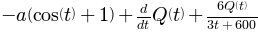

In [35]:
t,a,b  = symbols("t a b")
Q=Function("Q")
expr =Q(t).diff(t)-a*(1+cos(t))+6*(Q(t)/(600+3*t))
expr

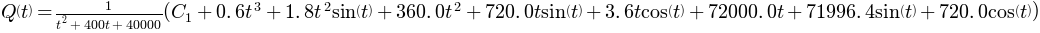

In [36]:
# Solve differential equation
sol = dsolve(expr,Q(t)).subs({a:9./5})
sol

const = {C1: 199280.000000000}
Applying initial conditions 
Q(t) = 


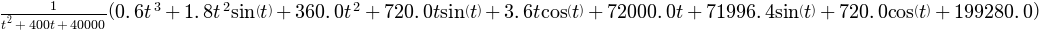

In [37]:
# Starting conditions Q(0) = 5
C1 = symbols("C1")
const = solve([sol.rhs.subs(t,0) - 5], [C1])
print "const =", const
# Replace C1 in solution
initvalue_solution = sol.rhs.subs({a:9./5,C1:const[C1]})
print "Applying initial conditions \nQ(t) = "
initvalue_solution

### Amount of salt when the tank overflows

In [38]:
overflow=initvalue_solution.subs({a:9./5,t:300})
N(overflow)

### Salt in the tank before it overflows

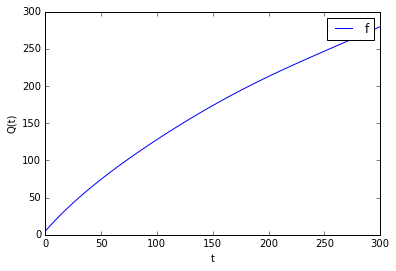

In [39]:
T = np.linspace(0, 300)
F = lambdify(t, initvalue_solution.subs({a:9./5}), "numpy")
dFdT = lambdify(t, initvalue_solution.subs({a:9./5}).diff(), "numpy")
plt.plot(T, F(T))
plt.legend("f(t)")
plt.xlabel("t")
plt.ylabel("Q(t)")

# Animaciones


In [40]:
from sympy import *
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys

init_printing(use_latex=True)

## Varying the rate at which Q(t) enters the tank

In [41]:
def solve_do1(init_con,alpha):
    t,a,b  = symbols("t a b")
    Q=Function("Q")
    expr =Q(t).diff(t)-a*(1+cos(t))+6*(Q(t)/(600+6*t))
    sol = dsolve(expr,Q(t)).subs({a:alpha})
    C1 = symbols("C1")
    const = solve([sol.rhs.subs(t,0) - init_con], [C1])
    initvalue_solution = sol.rhs.subs({a:alpha,C1:const[C1]})
    
    F = lambdify(t, initvalue_solution, "numpy")
    
    return F

In [42]:
def solve_do2(init_con,alpha):
    t,a,b  = symbols("t a b")
    Q=Function("Q")
    expr =Q(t).diff(t)-a*(1+cos(t))+6*(Q(t)/(600+3*t))
    sol = dsolve(expr,Q(t)).subs({a:alpha})
    C1 = symbols("C1")
    const = solve([sol.rhs.subs(t,0) - init_con], [C1])
    initvalue_solution = sol.rhs.subs({a:alpha,C1:const[C1]})
    
    F = lambdify(t, initvalue_solution, "numpy")
    
    return F

In [43]:
def generate_animation(fname, params1, params2, t_max=300, x_range=(-10,120)):
    global points1, points2,  c
    
    init_con1 = params1["init_con"]
    a1 = params1["alpha"]

    
    

    init_con2 = params2["init_con"]
    a2 = params2["alpha"]


    F1 = solve_do1( init_con1, a1)
    F2 = solve_do2( init_con2, a2)
    
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    s1_main   = plt.scatter(F1(0),0 , color="red", alpha=0.5, s=1000)
    s1_points = plt.scatter([], [] , color="blue", alpha=0.5, s=200)
    s2_main   = plt.scatter(F2(0),0 , color="red", alpha=0.5, s=1000)
    s2_points = plt.scatter([], [] , color="blue", alpha=0.5, s=200)
    text     = ax.text (x_range[0]+(x_range[1]-x_range[0])/2,30, "$t=0 secstou", size=30)#str(sats[i]), size=8)


    text1     = ax.text (x_range[0]+20,-10.35, "rate at which $Q(t)$ enters the tank=$%.2f$"%a1, size=20)#str(sats[i]), size=8)
    text2     = ax.text (x_range[1]-45,-10.35,  "rate at which $Q(t)$ enters the tank=$%.2f$"%a2, size=20)#str(sats[i]), size=8)
    
    
    plt.xlim(0,x_range[1])
    plt.ylim(-15,x_range[1])

    points1 = []
    points2 = []

    c=1
    print "frame number:",
    def update(time):
        global points1, points2, c;  
        if c%100==0: print c, 
        sys.stdout.flush(); c+=1    

        x1_pos = F1(time)
        x2_pos = F2(time)

        points1.append(x1_pos)
        points1 = points1[-500:]
        s1_main.set_offsets([[ 30, x1_pos ]])
        s1_points.set_offsets(np.vstack((30*np.ones(len(points1)),points1 )).T)

        points2.append(x2_pos)
        points2 = points2[-500:]
        s2_main.set_offsets([[ 100,x2_pos ]])
        s2_points.set_offsets(np.vstack((100*np.ones(len(points2)), points2)).T)
        
        
        text.set_text("$t=%6.2f secs$"%time)
    plt.close(fig)
    anim = animation.FuncAnimation(fig, update, np.arange(t_max)*1./10) #len(dtimes.keys()))
    anim.save(fname, writer="ffmpeg", fps=20, bitrate=1800)

In [44]:
params1 = { "init_con": 5,"alpha": 9./5}
params2 = { "init_con": 5,"alpha": 12./5}

generate_animation("Animaciones/renter.mp4", params1, params2, t_max=300, x_range=(-10,120))

frame number: 100 200 300


The animation shows the amount of salt on the tank as the time passes until the time is overloaded, 
the time should be in hours, but at the moment it shows seconds, 30 seconds = 300 hours

## Varying the rate at which Q(t) leaves the tank

If we increase the rate at which Q(t) leaves the tank  to 9 and the rate at which Q(t) enters the tank remains
the same, then, there is 600 +t gallons of water in the tank at any time , so ,the tank will 
overflow in t= 900 hours

In [45]:
def solve_do3(init_con,alpha):
    t,a,b  = symbols("t a b")
    Q=Function("Q")
    expr =Q(t).diff(t)-a*(1+cos(t))+9*(Q(t)/(600+3*t))
    sol = dsolve(expr,Q(t)).subs({a:alpha})
    C1 = symbols("C1")
    const = solve([sol.rhs.subs(t,0) - init_con], [C1])
    initvalue_solution = sol.rhs.subs({a:alpha,C1:const[C1]})
    
    F = lambdify(t, initvalue_solution, "numpy")
    
    return F

In [46]:
def generate_animation(fname, params1, params2, t_max=900, x_range=(-10,600)):
    global points1, points2,  c
    
    init_con1 = params1["init_con"]
    a1 = params1["alpha"]

    
    

    init_con2 = params2["init_con"]
    a2 = params2["alpha"]


    F1 = solve_do1( init_con1, a1)
    F2 = solve_do3( init_con2, a2)
    
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    s1_main   = plt.scatter(F1(0),0 , color="red", alpha=0.5, s=1000)
    s1_points = plt.scatter([], [] , color="blue", alpha=0.5, s=200)
    s2_main   = plt.scatter(F2(0),0 , color="red", alpha=0.5, s=1000)
    s2_points = plt.scatter([], [] , color="blue", alpha=0.5, s=200)
    text     = ax.text (x_range[0]+(x_range[1]-x_range[0])/2,30, "$t=0 secstou", size=30)#str(sats[i]), size=8)


    text1     = ax.text (x_range[0]+20,-10.35, "rate at which $Q(t)$ leaves the tank=$%.2f$"%a1, size=20)#str(sats[i]), size=8)
    text2     = ax.text (x_range[1]-220,-10.35,  "rate at which $Q(t)$ leaves the tank=$%.2f$"%a2, size=20)#str(sats[i]), size=8)
    
    
    plt.xlim(0,x_range[1])
    plt.ylim(-15,x_range[1])

    points1 = []
    points2 = []

    c=1
    print "frame number:",
    def update(time):
        global points1, points2, c;  
        if c%100==0: print c, 
        sys.stdout.flush(); c+=1    

        x1_pos = F1(time)
        x2_pos = F2(time)

        points1.append(x1_pos)
        points1 = points1[-500:]
        s1_main.set_offsets([[ 100, x1_pos ]])
        s1_points.set_offsets(np.vstack((100*np.ones(len(points1)),points1 )).T)

        points2.append(x2_pos)
        points2 = points2[-500:]
        s2_main.set_offsets([[ 500,x2_pos ]])
        s2_points.set_offsets(np.vstack((500*np.ones(len(points2)), points2)).T)
        
        
        text.set_text("$t=%6.2f secs$"%time)
    plt.close(fig)
    anim = animation.FuncAnimation(fig, update, np.arange(t_max)*1./10) #len(dtimes.keys()))
    anim.save(fname, writer="ffmpeg", fps=70, bitrate=1800)

In [47]:
params1 = { "init_con": 5,"alpha": 6}
params2 = { "init_con": 5,"alpha": 9}

generate_animation("Animaciones/rleave1.mp4", params1, params2, t_max=900, x_range=(-10,600))

frame number: 100 200 300 400 500 600 700 800 900
